# Processing EUR Twitter sentiment

In this notebook, I am going to load the tweets about the European Central Bank and European Union countries in order to estimate sentiment around the Euro in each day. This will be used as a proxy of the expectations of the economic agents about this fiat currency (see the README for further details).

Set the working directory as usual:

In [1]:
import os

os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")
os.getcwd()

## Load tweet data

List the paths all json files with Twitter data about the Euro:

In [2]:
list_paths = ["search_euro_bank_twitter_1999_1_1.json",
              "hashtag_euro_bank_twitter_1999_1_1.json",
              "search_european_union_economy_twitter_1999_1_1.json",
              "search_eu_debt_crisis_twitter_1999_1_1.json", 
              "search_greece_economy_twitter_1999_1_1.json",
              "search_italy_economy_twitter_1999_1_1.json",
              "search_spain_economy_twitter_1999_1_1.json",
              "search_portugal_economy_twitter_1999_1_1.json",
              "search_cyprus_economy_twitter_1999_1_1.json",
              "search_slovenia_economy_twitter_1999_1_1.json",
              "search_france_economy_twitter_1999_1_1.json",
              "search_belgium_economy_twitter_1999_1_1.json",
              "search_croatia_economy_twitter_1999_1_1.json", 
              "search_ireland_economy_twitter_1999_1_1.json",
              "search_germany_economy_twitter_1999_1_1.json", 
              "search_netherlands_economy_twitter_1999_1_1.json", 
              "search_finland_economy_twitter_1999_1_1.json", 
              "search_austria_economy_twitter_1999_1_1.json", 
              "search_luxembourg_economy_twitter_1999_1_1.json", 
              "search_slovakia_economy_twitter_1999_1_1.json", 
              "search_malta_economy_twitter_1999_1_1.json", 
              "search_estonia_economy_twitter_1999_1_1.json", 
              "search_latvia_economy_twitter_1999_1_1.json", 
              "search_lithuania_economy_twitter_1999_1_1.json", 
              "search_trichet_twitter.json", 
              "hashtag_draghi_twitter.json", 
              "hashtag_lagarde_twitter.json"]
len(list_paths)

27

Read all jason files in parallel:

In [3]:
%%time
import multiprocessing as mp
import pandas as pd

def read_tweet_data(path):
    return pd.read_json("data/json_files/"+path, lines=True)

with mp.Pool(10) as pool:
    list_input_df = list(pool.map(read_tweet_data, list_paths))
        #for each row in tweets_df_en["rawContent"], apply sentiment_per_row across 10 cores
        #https://stackoverflow.com/questions/45545110/make-pandas-dataframe-apply-use-all-cores
    pool.close()
list_input_df

CPU times: user 1min 19s, sys: 18.7 s, total: 1min 37s
Wall time: 1min 52s


[                                 _type  \
 0       snscrape.modules.twitter.Tweet   
 1       snscrape.modules.twitter.Tweet   
 2       snscrape.modules.twitter.Tweet   
 3       snscrape.modules.twitter.Tweet   
 4       snscrape.modules.twitter.Tweet   
 ...                                ...   
 479054  snscrape.modules.twitter.Tweet   
 479055  snscrape.modules.twitter.Tweet   
 479056  snscrape.modules.twitter.Tweet   
 479057  snscrape.modules.twitter.Tweet   
 479058  snscrape.modules.twitter.Tweet   
 
                                                       url  \
 0       https://twitter.com/harisonhbn9718/status/1562...   
 1       https://twitter.com/TheBigArena/status/1562521...   
 2       https://twitter.com/DefoesInvest/status/156251...   
 3       https://twitter.com/N013Q/status/1562510373445...   
 4       https://twitter.com/CleanAirMoms/status/156249...   
 ...                                                   ...   
 479054        https://twitter.com/BBCWorld/stat

In [4]:
%%script false --no-raise-error 
#alternative approach to load the json files, slower and larger memory footprint, so avoid running it

%%time
import pandas as pd
list_input_df = list(map(lambda path: pd.read_json("data/json_files/"+path, lines=True), list_paths))
list_input_df

Combine all data frames within the list:

In [5]:
tweets_df = pd.concat(list_input_df)
tweets_df[["id", "date", "rawContent"]]

,id,date,rawContent
0,1562541528740151296,2022-08-24 20:45:05+00:00,Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
1,1562521759454138368,2022-08-24 19:26:32+00:00,#EURUSD at 0.99 for the first time since 2003....
2,1562515396330422275,2022-08-24 19:01:15+00:00,The European Central Bank (ECB) is planning to...
3,1562510373445545985,2022-08-24 18:41:17+00:00,"In the digital economy, cash is no longer a us..."
4,1562499651952996352,2022-08-24 17:58:41+00:00,Reading: What the U.S. Federal Reserve must do...
...,...,...,...
34302,1173870255543902214,2019-09-17 08:04:13+00:00,"Pulver endgültig verschossen, #EZB-Rat tief ge..."
34303,1173862961817014273,2019-09-17 07:35:14+00:00,"#ECB, i.c. #Draghi, bedrijft politiek; dat wor..."
34304,1173861717358665728,2019-09-17 07:30:17+00:00,¿Cómo serán las #hipotecas con #Lagarde al fre...
34305,1173861522092765184,2019-09-17 07:29:30+00:00,Ma chronique hebdo taux @allnews_ch #Powell #f...


Inspect the new data.frame:

In [6]:
print(tweets_df.shape)
    #as many rows as tweets
    #as many columns as features in each tweet

(3123850, 28)


In [7]:
print(tweets_df.columns)

Index(['_type', 'url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card'],
      dtype='object')


In [8]:
#get all columns for the first tweet
print(tweets_df.iloc[0, :])

_type                                  snscrape.modules.twitter.Tweet
url                 https://twitter.com/harisonhbn9718/status/1562...
date                                        2022-08-24 20:45:05+00:00
rawContent          Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
renderedContent     Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
id                                                1562541528740151296
user                {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                          0
retweetCount                                                        0
likeCount                                                           0
quoteCount                                                          0
conversationId                                    1562541528740151296
lang                                                               en
source              <a href="https://mobile.twitter.com" rel="nofo...
sourceUrl           

Reset the indeces just in case:

In [9]:
tweets_df = tweets_df.reset_index(drop=True)
    #use drop drop parameter to avoid the old index being added as a column
tweets_df[["id", "date", "rawContent"]]

,id,date,rawContent
0,1562541528740151296,2022-08-24 20:45:05+00:00,Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
1,1562521759454138368,2022-08-24 19:26:32+00:00,#EURUSD at 0.99 for the first time since 2003....
2,1562515396330422275,2022-08-24 19:01:15+00:00,The European Central Bank (ECB) is planning to...
3,1562510373445545985,2022-08-24 18:41:17+00:00,"In the digital economy, cash is no longer a us..."
4,1562499651952996352,2022-08-24 17:58:41+00:00,Reading: What the U.S. Federal Reserve must do...
...,...,...,...
3123845,1173870255543902214,2019-09-17 08:04:13+00:00,"Pulver endgültig verschossen, #EZB-Rat tief ge..."
3123846,1173862961817014273,2019-09-17 07:35:14+00:00,"#ECB, i.c. #Draghi, bedrijft politiek; dat wor..."
3123847,1173861717358665728,2019-09-17 07:30:17+00:00,¿Cómo serán las #hipotecas con #Lagarde al fre...
3123848,1173861522092765184,2019-09-17 07:29:30+00:00,Ma chronique hebdo taux @allnews_ch #Powell #f...


In [10]:
#check we have the expected number of rows
tweets_df.shape[0] == sum([len(data_frame) for data_frame in list_input_df])

True

In [11]:
#release space
import gc

del(list_input_df)
gc.collect()

0

## Process tweet data

First, check for duplicated tweets, i.e., the same tweet found in two different searches:

In [12]:
tweets_df["id"].duplicated().any()

True

In [13]:
#take a look to one of the duplicated IDs
example_duplicated_id = tweets_df[tweets_df["id"].duplicated()].iloc[2,:].loc["id"] #get the ID

#get the URL for all tweets having the example ID and check if there are identical URLs
tweets_df.loc[tweets_df["id"] == example_duplicated_id, "url"].duplicated().any()
    #tweets with the same ID have the same URL, so they are the same tweet

True

Remove duplicated tweets:

In [14]:
#remove tweets with a duplicated id
tweets_df = tweets_df.drop_duplicates(subset=['id'])
tweets_df.shape

(2914653, 28)

Now check language:

In [15]:
import numpy as np

np.unique(tweets_df["lang"])

array(['am', 'ar', 'bg', 'bn', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'el',
       'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'gu', 'hi', 'ht', 'hu',
       'hy', 'in', 'is', 'it', 'iw', 'ja', 'ka', 'kn', 'ko', 'lt', 'lv',
       'ml', 'mr', 'my', 'ne', 'nl', 'no', 'or', 'pa', 'pl', 'ps', 'pt',
       'qam', 'qht', 'qme', 'qst', 'ro', 'ru', 'sd', 'si', 'sl', 'sr',
       'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'und', 'ur', 'vi', 'zh',
       'zxx'], dtype=object)

In [16]:
#see tweets not in english
sum(tweets_df["lang"] != "en")

405207

Select only tweets in English:

In [17]:
#select only tweets in english
tweets_df_en = tweets_df[tweets_df["lang"] == "en"]
tweets_df_en.shape

(2509446, 28)

In [18]:
#release space
import gc

del(tweets_df)
gc.collect()

0

It seems that "rawContent" shows the raw tweet content, while "renderedContent" show the strings that would bet shown by the web app ([link](https://github.com/JustAnotherArchivist/snscrape/issues/479)). We are going to use the raw tweet because it seem it could have more information. They do not seem to be very different anyways:

In [19]:
tweets_df_en.loc[:, "rawContent"].iloc[0:10,]

0    Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
1    #EURUSD at 0.99 for the first time since 2003....
2    The European Central Bank (ECB) is planning to...
3    In the digital economy, cash is no longer a us...
4    Reading: What the U.S. Federal Reserve must do...
5    NEW - European Central Bank’s Rehn: The invest...
6    Crypto: European industry in danger! https://t...
7    If there is one thing households in this count...
8    @moonblocks_ @lucas_gool @FinanceChainge @Bloc...
9    The European Central Bank creates a unified re...
Name: rawContent, dtype: object

In [20]:
tweets_df_en.loc[:, "renderedContent"].iloc[0:10,]

0    Economic Calendar for Tomorrow:\n\n🇩🇪1) German...
1    #EURUSD at 0.99 for the first time since 2003....
2    The European Central Bank (ECB) is planning to...
3    In the digital economy, cash is no longer a us...
4    Reading: What the U.S. Federal Reserve must do...
5    NEW - European Central Bank’s Rehn: The invest...
6    Crypto: European industry in danger! geeky.new...
7    If there is one thing households in this count...
8    @moonblocks_ @lucas_gool @FinanceChainge @Bloc...
9    The European Central Bank creates a unified re...
Name: renderedContent, dtype: object

## Sentiment analysis of tweets

I will use VADER to perform the sentiment analysis. There are alternatives like TextBlob, but VADER meets well our requeriments: 

- It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
- Get a positive, negative neutral scores and a compound score.
- Labelled data not required because it is pre-trained ([link](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664), [link](https://towardsdatascience.com/sentiment-analysis-of-tweets-167d040f0583)).

See functioning with a example tweet:

In [21]:
example_tweet = tweets_df_en.loc[1, "rawContent"]

In [22]:
#VADER can be used from vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#open instance
analyzer = SentimentIntensityAnalyzer()

#example
print(analyzer.polarity_scores(example_tweet))
print(example_tweet)

{'neg': 0.252, 'neu': 0.71, 'pos': 0.038, 'compound': -0.8294}
#EURUSD at 0.99 for the first time since 2003.
 The war, the energy crisis, the drought, but also the delayed reaction of the European Central Bank to moderate inflation weakened the EU currency. https://t.co/qkNjD8u8ND


The example tweet is cleary a negative tweet about Europe's situation and in particular the decision made by the ECB.

Now compare the implementation of VADER in nlTK:

In [23]:
#or from nlTK
import nltk
nltk.download('vader_lexicon')

#instance
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dftortosa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
#we get similar results
print(sid.polarity_scores(example_tweet))
print(analyzer.polarity_scores(example_tweet))

{'neg': 0.252, 'neu': 0.71, 'pos': 0.038, 'compound': -0.8294}
{'neg': 0.252, 'neu': 0.71, 'pos': 0.038, 'compound': -0.8294}


Now, define a function to clean the tweet text and the to apply the sentiment analysis across the pandas DF:

In [25]:
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()).replace("#", "")

In [26]:
print(example_tweet)
clean_tweet(example_tweet)

#EURUSD at 0.99 for the first time since 2003.
 The war, the energy crisis, the drought, but also the delayed reaction of the European Central Bank to moderate inflation weakened the EU currency. https://t.co/qkNjD8u8ND


'EURUSD at 0.99 for the first time since 2003. The war the energy crisis the drought but also the delayed reaction of the European Central Bank to moderate inflation weakened the EU currency'

Apply VADER to the cleaned tweet:

In [27]:
print(analyzer.polarity_scores(clean_tweet(example_tweet)))

{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'compound': -0.8294}


We are going to use the compound sentiment. In this way, we consider both the negative and positive sentiment around the BCE and the economy of Europe.

In [28]:
#define function to be applied per row
def sentiment_per_row(raw_tweet, sentiment_type="compound"):
        
    #clean
    tweet_cleaned = clean_tweet(raw_tweet)
    
    #get the negative sentiment
    sentiment = analyzer.polarity_scores(tweet_cleaned)[sentiment_type]

    #return
    return sentiment

Apply across rows in parallel:

In [29]:
import multiprocessing as mp

with mp.Pool(10) as pool:
    tweets_df_en["sentiment"] = pool.map(sentiment_per_row, tweets_df_en["rawContent"])
        #for each row in tweets_df_en["rawContent"], apply sentiment_per_row across 10 cores
        #https://stackoverflow.com/questions/45545110/make-pandas-dataframe-apply-use-all-cores
    pool.close()

Subset to get only the date and the sentiment:

In [30]:
sentiment_results_df_eur = tweets_df_en[["date", "sentiment"]]
sentiment_results_df_eur

,date,sentiment
0,2022-08-24 20:45:05+00:00,-0.7351
1,2022-08-24 19:26:32+00:00,-0.8294
2,2022-08-24 19:01:15+00:00,0.4404
3,2022-08-24 18:41:17+00:00,0.4588
4,2022-08-24 17:58:41+00:00,-0.2732
...,...,...
3123824,2019-09-17 09:51:04+00:00,-0.9360
3123825,2019-09-17 09:42:17+00:00,-0.2120
3123828,2019-09-17 09:29:04+00:00,-0.1036
3123829,2019-09-17 09:18:08+00:00,-0.0806


In [31]:
#release space
import gc

del(tweets_df_en)
gc.collect()

0

In the date, leave only year, month and day because I only have one EUr pricing observation per day:

In [32]:
sentiment_results_df_eur["date"] = pd.to_datetime(sentiment_results_df_eur["date"].dt.strftime('%Y-%m-%d'))
    #https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
    #https://stackoverflow.com/questions/20689288/converting-pandas-columns-to-datetime64-including-missing-values
sentiment_results_df_eur

,date,sentiment
0,2022-08-24,-0.7351
1,2022-08-24,-0.8294
2,2022-08-24,0.4404
3,2022-08-24,0.4588
4,2022-08-24,-0.2732
...,...,...
3123824,2019-09-17,-0.9360
3123825,2019-09-17,-0.2120
3123828,2019-09-17,-0.1036
3123829,2019-09-17,-0.0806


Check we have rows ordered in chronological order:

In [33]:
sentiment_results_df_eur.equals(sentiment_results_df_eur.sort_index())

True

Next, I am going to calculate several metrics for the sentiment of each day and save them in list of data frames. It is possible to calculate the mean, median, etc...

In [34]:
sentiment_results_df_eur.groupby("date")["sentiment"].mean()

date
2007-01-11    0.458800
2007-01-15    0.510600
2007-01-30    0.000000
2007-02-08    0.458800
2007-03-07    0.458800
                ...   
2022-08-20   -0.018176
2022-08-21   -0.050997
2022-08-22   -0.031427
2022-08-23   -0.003926
2022-08-24   -0.024908
Name: sentiment, Length: 5338, dtype: float64

I can also use lambda to define other calculations like the interquartile range:

In [35]:
sentiment_results_df_eur.groupby("date")["sentiment"].apply(lambda x: (np.percentile(x, 75) - np.percentile(x, 25)))

date
2007-01-11    0.000000
2007-01-15    0.000000
2007-01-30    0.000000
2007-02-08    0.000000
2007-03-07    0.000000
                ...   
2022-08-20    0.840200
2022-08-21    0.956225
2022-08-22    0.790850
2022-08-23    0.951000
2022-08-24    0.850850
Name: sentiment, Length: 5338, dtype: float64

In [36]:
sentiment_results_df_eur.groupby("date")["sentiment"].std()

date
2007-01-11         NaN
2007-01-15         NaN
2007-01-30         NaN
2007-02-08    0.000000
2007-03-07         NaN
                ...   
2022-08-20    0.529359
2022-08-21    0.545527
2022-08-22    0.499470
2022-08-23    0.524858
2022-08-24    0.523156
Name: sentiment, Length: 5338, dtype: float64

std gives NA for cases with n=1

In [37]:
print(pd.DataFrame([1,1]).std()) #std = 0
print(pd.DataFrame([1,2]).std()) #std = 0.7
print(pd.DataFrame([1]).std()) #std = NaN

0    0.0
dtype: float64
0    0.707107
dtype: float64
0   NaN
dtype: float64


This is solved using ddof=0. ddof is Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements


In [38]:
print(pd.DataFrame([1,1]).std(ddof=0)) #std = 0
print(pd.DataFrame([1,2]).std(ddof=0)) #std = 0.7
print(pd.DataFrame([1]).std(ddof=0)) #std = NaN

0    0.0
dtype: float64
0    0.5
dtype: float64
0    0.0
dtype: float64


I get the same results with np.std and .std(ddof=0)

In [39]:
print(np.std([1,1])) #std = 0
print(np.std([1,2])) #std = 0.7
print(np.std([1])) #std = NaN

0.0
0.5
0.0


It is also possible calculate the range:

In [40]:
sentiment_results_df_eur.groupby("date")["sentiment"].apply(lambda x: np.max(x) - np.min(x))

date
2007-01-11    0.0000
2007-01-15    0.0000
2007-01-30    0.0000
2007-02-08    0.0000
2007-03-07    0.0000
               ...  
2022-08-20    1.9142
2022-08-21    1.9470
2022-08-22    1.9297
2022-08-23    1.9362
2022-08-24    1.8991
Name: sentiment, Length: 5338, dtype: float64

Variance:

In [41]:
sentiment_results_df_eur.groupby("date")["sentiment"].var()

date
2007-01-11         NaN
2007-01-15         NaN
2007-01-30         NaN
2007-02-08    0.000000
2007-03-07         NaN
                ...   
2022-08-20    0.280221
2022-08-21    0.297600
2022-08-22    0.249470
2022-08-23    0.275476
2022-08-24    0.273692
Name: sentiment, Length: 5338, dtype: float64

I am going to use evaluate inside the function in order to perform different operations. For example:

In [42]:
operation="mean"
string_evaluate = 'sentiment_results_df_eur.groupby("date")["sentiment"].' + operation + '().to_frame()'
string_evaluate

'sentiment_results_df_eur.groupby("date")["sentiment"].mean().to_frame()'

In [43]:
eval(string_evaluate)

,sentiment
date,
2007-01-11,0.458800
2007-01-15,0.510600
2007-01-30,0.000000
2007-02-08,0.458800
2007-03-07,0.458800
...,...
2022-08-20,-0.018176
2022-08-21,-0.050997
2022-08-22,-0.031427


I am interested in having a row per day irrespectively of having or not sentiment data. In this way, I can exactly calculate the sentiment of 1, 10... days ago:

It is possible to use min and max to select the earliest and latest dates:

In [44]:
print(np.min(np.unique(sentiment_results_df_eur["date"])))
print(np.max(np.unique(sentiment_results_df_eur["date"])))

2007-01-11T00:00:00.000000000
2022-08-24T00:00:00.000000000


First, calculate the time range from the earliest to latest date:

In [45]:
idx = pd.date_range(np.min(np.unique(sentiment_results_df_eur["date"])), 
                    np.max(np.unique(sentiment_results_df_eur["date"])))
idx

DatetimeIndex(['2007-01-11', '2007-01-12', '2007-01-13', '2007-01-14',
               '2007-01-15', '2007-01-16', '2007-01-17', '2007-01-18',
               '2007-01-19', '2007-01-20',
               ...
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23', '2022-08-24'],
              dtype='datetime64[ns]', length=5705, freq='D')

As an example, calculate the mean sentiment in tweets per day and then re-index considering all days between the earliest and latest date. Those dates without tweets will have NaN:

In [46]:
sentiment_results_df_eur.groupby("date")["sentiment"].mean().reindex(idx, fill_value=np.NaN)

2007-01-11    0.458800
2007-01-12         NaN
2007-01-13         NaN
2007-01-14         NaN
2007-01-15    0.510600
                ...   
2022-08-20   -0.018176
2022-08-21   -0.050997
2022-08-22   -0.031427
2022-08-23   -0.003926
2022-08-24   -0.024908
Freq: D, Name: sentiment, Length: 5705, dtype: float64

You can see how there is a gap without tweets between 11 and 15 of January and, accordingly, the days in between have NaN.

It is also possible to shift the rows after making an operation per day, i.e., move the value of day 1 to day 2, value of day 2 to day 3, and so on...

In [47]:
#first calculate the average sentiment per day
sentiment_results_df_eur.groupby("date")["sentiment"].mean().reindex(idx, fill_value=np.NaN)

2007-01-11    0.458800
2007-01-12         NaN
2007-01-13         NaN
2007-01-14         NaN
2007-01-15    0.510600
                ...   
2022-08-20   -0.018176
2022-08-21   -0.050997
2022-08-22   -0.031427
2022-08-23   -0.003926
2022-08-24   -0.024908
Freq: D, Name: sentiment, Length: 5705, dtype: float64

In [48]:
#Now shift 2 days, so 2022-08-24 has now the average of the previous day (2022-08-23)
sentiment_results_df_eur.groupby("date")["sentiment"].mean().reindex(idx, fill_value=np.NaN).shift(1)

2007-01-11         NaN
2007-01-12    0.458800
2007-01-13         NaN
2007-01-14         NaN
2007-01-15         NaN
                ...   
2022-08-20   -0.002530
2022-08-21   -0.018176
2022-08-22   -0.050997
2022-08-23   -0.031427
2022-08-24   -0.003926
Freq: D, Name: sentiment, Length: 5705, dtype: float64

Shift zero would be equal to the original variable, no change:

In [49]:
sentiment_results_df_eur.groupby("date")["sentiment"].mean().reindex(idx, fill_value=np.NaN).shift(0).equals(sentiment_results_df_eur.groupby("date")["sentiment"].mean().reindex(idx, fill_value=np.NaN))

True

In [50]:
sentiment_results_df_eur["sentiment"].shift(0).equals(sentiment_results_df_eur["sentiment"])

True

Now, I am going to calculate different summary statistics of the sentiment of the previous days using two functions:

In [51]:
def groupby_calcs(operation, metric_name, args="", n_previous_days=1, currency=""):
        
    #get the string with the operation name
    string_evaluate = 'sentiment_results_df_' + currency + '.groupby("date")["sentiment"].' + operation + '(' + args + ').to_frame()'
        #do operations for the sentiment of each day and then convert to df

    #evaluate to get the DF with the calculations per day
    data_frame = eval(string_evaluate)
    
    #extract the range of days for which we have data
    time_range = pd.date_range(np.min(np.unique(data_frame.index)), 
                        np.max(np.unique(data_frame.index)))
    
    #fill with NaN those dates with data
    data_frame = data_frame.reindex(time_range, fill_value=np.NaN)
        #https://stackoverflow.com/questions/15610805/accessing-row-from-previous-day-in-pandas-dataframe-with-apply
    
    #get sentiment of the previous days
    data_frame['sentiment'] = data_frame['sentiment'].shift(n_previous_days)
        #https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
        
    #reset the index
    data_frame = data_frame.reset_index(level=0)
        #set the index (date) as column 
  
    #change the column name for sentiment
    data_frame = data_frame.rename(columns={'index': 'date', 'sentiment': metric_name + '_sent_' + currency + '_previous_' + str(n_previous_days) + '_days'})

    #append the df to the list
    return data_frame
    
def groupby_calcs_across_dates(list_metrics, previous_date, currency=""):
        
    #open list to save each calculation
    list_data_frames = []
    
    #apply each operation
    for metric in list_metrics:
        
        #for std
        if metric == "std":
            #use ddof=0 to get zero for cases with 1 tweet per day (see above)
            result_calc = groupby_calcs(operation=metric, 
                          metric_name=metric, 
                          args='ddof=0', 
                          n_previous_days=previous_date, 
                          currency=currency)
        elif "quantile" in metric: #if quantile
            #get the operation name and the quantile number
            operation_name = metric.split("_")[0]
            quantile_number = metric.split("_")[1]
            result_calc = groupby_calcs(operation=operation_name, 
                          metric_name=metric, 
                          args=quantile_number, 
                          n_previous_days=previous_date, 
                          currency=currency) 
        elif "range" in metric:
            result_calc = groupby_calcs(operation="apply", 
                          metric_name=metric, 
                          args="lambda x: np.max(x) - np.min(x)",
                          n_previous_days=previous_date, 
                          currency=currency)
        elif "iqr" in metric:
            result_calc = groupby_calcs(operation="apply", 
                          metric_name=metric, 
                          args="lambda x: (np.percentile(x, 75) - np.percentile(x, 25))",
                          n_previous_days=previous_date, 
                          currency=currency)   
        else: 
            result_calc = groupby_calcs(operation=metric, 
                          metric_name=metric, 
                          n_previous_days=previous_date, 
                          currency=currency)
        
        #save in the list  
        list_data_frames.append(result_calc)
    return list_data_frames

Define a list with the metrics to be calculated:

In [52]:
#define a list of operations to do
list_metrics = ["quantile_0.05",
                "quantile_0.1",
                "quantile_0.2",
                "quantile_0.3",
                "quantile_0.4",
                "quantile_0.5",
                "quantile_0.6",
                "quantile_0.7",
                "quantile_0.8",
                "quantile_0.9",
                "quantile_0.95",
                "mean",
                "min",
                "max",
                "sum",
                "count", 
                    #this can be useful to control for averages with low number of tweets
                    #but also to consider how much people is talking about Europe's economy 
                "range", 
                "var", 
                "std", 
                "iqr"]

In [53]:
groupby_calcs_across_dates(list_metrics=list_metrics, previous_date=2, currency="eur")

[           date  quantile_0.05_sent_eur_previous_2_days
 0    2007-01-11                                     NaN
 1    2007-01-12                                     NaN
 2    2007-01-13                                0.458800
 3    2007-01-14                                     NaN
 4    2007-01-15                                     NaN
 ...         ...                                     ...
 5700 2022-08-20                               -0.798310
 5701 2022-08-21                               -0.817600
 5702 2022-08-22                               -0.840425
 5703 2022-08-23                               -0.848100
 5704 2022-08-24                               -0.825720
 
 [5705 rows x 2 columns],
            date  quantile_0.1_sent_eur_previous_2_days
 0    2007-01-11                                    NaN
 1    2007-01-12                                    NaN
 2    2007-01-13                                0.45880
 3    2007-01-14                                    NaN
 4    20

I am going to calculate the summary statistics for the sentiment several days before the current day

In [54]:
list_dates = np.arange(1, 16, 1)

#open a pool with 10 processes
pool_dates = mp.Pool(processes=10)

#apply the function for each previous day in parallel across 10 cores
list_data_frames = [pool_dates.apply_async(groupby_calcs_across_dates, args=(list_metrics, previous_date, "eur")).get() for previous_date in list_dates]
    #https://stackoverflow.com/questions/42843203/how-to-get-the-result-of-multiprocessing-pool-apply-async

#close the pool
pool_dates.close()

In [55]:
#release space
import gc

del(sentiment_results_df_eur)
gc.collect()

0

In [56]:
list_data_frames[0][0]

,date,quantile_0.05_sent_eur_previous_1_days
0,2007-01-11,NaN
1,2007-01-12,0.458800
2,2007-01-13,NaN
3,2007-01-14,NaN
4,2007-01-15,NaN
...,...,...
5700,2022-08-20,-0.817600
5701,2022-08-21,-0.840425
5702,2022-08-22,-0.848100
5703,2022-08-23,-0.825720


Flat the list to get just a list of data frame and not a list of lists:

In [57]:
flat_list = [item for sublist in list_data_frames for item in sublist]
flat_list

[           date  quantile_0.05_sent_eur_previous_1_days
 0    2007-01-11                                     NaN
 1    2007-01-12                                0.458800
 2    2007-01-13                                     NaN
 3    2007-01-14                                     NaN
 4    2007-01-15                                     NaN
 ...         ...                                     ...
 5700 2022-08-20                               -0.817600
 5701 2022-08-21                               -0.840425
 5702 2022-08-22                               -0.848100
 5703 2022-08-23                               -0.825720
 5704 2022-08-24                               -0.822545
 
 [5705 rows x 2 columns],
            date  quantile_0.1_sent_eur_previous_1_days
 0    2007-01-11                                    NaN
 1    2007-01-12                                0.45880
 2    2007-01-13                                    NaN
 3    2007-01-14                                    NaN
 4    20

Check we have the correct number of data frames:

In [58]:
len(flat_list) == len(list_metrics) * len(list_dates)

True

Merge all data frames:

In [59]:
from functools import reduce

#merge them using reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='inner'), [element for element in flat_list])
    #https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
df_merged

,date,quantile_0.05_sent_eur_previous_1_days,quantile_0.1_sent_eur_previous_1_days,quantile_0.2_sent_eur_previous_1_days,quantile_0.3_sent_eur_previous_1_days,quantile_0.4_sent_eur_previous_1_days,quantile_0.5_sent_eur_previous_1_days,quantile_0.6_sent_eur_previous_1_days,quantile_0.7_sent_eur_previous_1_days,quantile_0.8_sent_eur_previous_1_days,...,quantile_0.95_sent_eur_previous_15_days,mean_sent_eur_previous_15_days,min_sent_eur_previous_15_days,max_sent_eur_previous_15_days,sum_sent_eur_previous_15_days,count_sent_eur_previous_15_days,range_sent_eur_previous_15_days,var_sent_eur_previous_15_days,std_sent_eur_previous_15_days,iqr_sent_eur_previous_15_days
0,2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-12,0.458800,0.45880,0.45880,0.45880,0.45880,0.4588,0.45880,0.45880,0.45880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,2022-08-20,-0.817600,-0.73698,-0.54230,-0.32233,-0.07720,0.0000,0.17790,0.36120,0.49012,...,0.856340,0.005388,-0.9509,0.9699,2.3437,435.0,1.9208,0.308111,0.554439,0.97615
5701,2022-08-21,-0.840425,-0.76145,-0.59600,-0.37150,-0.15480,0.0000,0.12800,0.34000,0.51870,...,0.805240,-0.068454,-0.9716,0.9590,-20.3308,297.0,1.9306,0.258977,0.508040,0.78200
5702,2022-08-22,-0.848100,-0.79559,-0.62490,-0.44865,-0.23486,0.0000,0.03332,0.31820,0.46238,...,0.815185,0.029901,-0.9805,0.9626,11.0633,370.0,1.9431,0.285555,0.533651,0.87860
5703,2022-08-23,-0.825720,-0.70858,-0.55438,-0.36120,-0.12800,0.0000,0.03186,0.29456,0.44040,...,0.823200,0.026195,-0.9625,0.9371,11.2901,431.0,1.8996,0.282923,0.531287,0.86990


## See NaN and visualize data

In [60]:
#see NaN
print(df_merged.isnull().sum())
    #We have NaNs for days that do not have prior twitter data in the selected previous day

date                                        0
quantile_0.05_sent_eur_previous_1_days    368
quantile_0.1_sent_eur_previous_1_days     368
quantile_0.2_sent_eur_previous_1_days     368
quantile_0.3_sent_eur_previous_1_days     368
                                         ... 
count_sent_eur_previous_15_days           382
range_sent_eur_previous_15_days           382
var_sent_eur_previous_15_days             505
std_sent_eur_previous_15_days             382
iqr_sent_eur_previous_15_days             382
Length: 301, dtype: int64


We cannot just set as zero those NaN cases because I am using a compound sentiment (-1 to 1), so 0 is nuetral and lower (negative) values means negative sentiment.

In [61]:
df_merged["quantile_0.05_sent_eur_previous_1_days"].describe()

count    5337.000000
mean       -0.673198
std         0.207630
min        -0.971200
25%        -0.796180
50%        -0.726900
75%        -0.624900
max         0.875000
Name: quantile_0.05_sent_eur_previous_1_days, dtype: float64

Remove these NA cases:

In [62]:
df_merged = df_merged.dropna()
df_merged

,date,quantile_0.05_sent_eur_previous_1_days,quantile_0.1_sent_eur_previous_1_days,quantile_0.2_sent_eur_previous_1_days,quantile_0.3_sent_eur_previous_1_days,quantile_0.4_sent_eur_previous_1_days,quantile_0.5_sent_eur_previous_1_days,quantile_0.6_sent_eur_previous_1_days,quantile_0.7_sent_eur_previous_1_days,quantile_0.8_sent_eur_previous_1_days,...,quantile_0.95_sent_eur_previous_15_days,mean_sent_eur_previous_15_days,min_sent_eur_previous_15_days,max_sent_eur_previous_15_days,sum_sent_eur_previous_15_days,count_sent_eur_previous_15_days,range_sent_eur_previous_15_days,var_sent_eur_previous_15_days,std_sent_eur_previous_15_days,iqr_sent_eur_previous_15_days
637,2008-10-09,-0.464215,-0.27320,-0.14796,0.00000,0.16630,0.2263,0.22630,0.22630,0.30340,...,0.000000,0.000000,0.0000,0.0000,0.0000,2.0,0.0000,0.000000,0.000000,0.000000
638,2008-10-10,-0.421500,-0.42150,-0.37326,-0.28336,-0.10000,0.0000,0.00000,0.08880,0.30044,...,-0.144280,-0.443287,-0.6808,-0.0516,-3.5463,8.0,0.6292,0.041444,0.190429,0.226825
639,2008-10-11,-0.566100,-0.56030,-0.53898,-0.52670,-0.52670,-0.5267,-0.52670,-0.46358,-0.16238,...,0.538165,-0.159530,-0.5574,0.7003,-1.5953,10.0,1.2577,0.177070,0.399203,0.510600
640,2008-10-12,-0.443665,-0.12233,0.25262,0.40924,0.46062,0.5010,0.52670,0.52670,0.52670,...,0.706835,0.075140,-0.7311,0.7841,0.7514,10.0,1.5152,0.269558,0.492546,0.757350
683,2008-11-24,-0.263670,-0.25414,-0.23508,-0.21602,-0.19696,-0.1779,-0.14232,-0.10674,-0.07116,...,0.672170,0.504500,0.3182,0.6908,1.0090,2.0,0.3726,0.069415,0.186300,0.186300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,2022-08-20,-0.817600,-0.73698,-0.54230,-0.32233,-0.07720,0.0000,0.17790,0.36120,0.49012,...,0.856340,0.005388,-0.9509,0.9699,2.3437,435.0,1.9208,0.308111,0.554439,0.976150
5701,2022-08-21,-0.840425,-0.76145,-0.59600,-0.37150,-0.15480,0.0000,0.12800,0.34000,0.51870,...,0.805240,-0.068454,-0.9716,0.9590,-20.3308,297.0,1.9306,0.258977,0.508040,0.782000
5702,2022-08-22,-0.848100,-0.79559,-0.62490,-0.44865,-0.23486,0.0000,0.03332,0.31820,0.46238,...,0.815185,0.029901,-0.9805,0.9626,11.0633,370.0,1.9431,0.285555,0.533651,0.878600
5703,2022-08-23,-0.825720,-0.70858,-0.55438,-0.36120,-0.12800,0.0000,0.03186,0.29456,0.44040,...,0.823200,0.026195,-0.9625,0.9371,11.2901,431.0,1.8996,0.282923,0.531287,0.869900


Plot all the metrics only for the previous day (1 day):

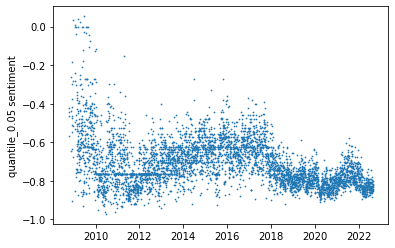

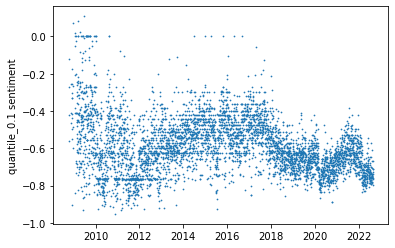

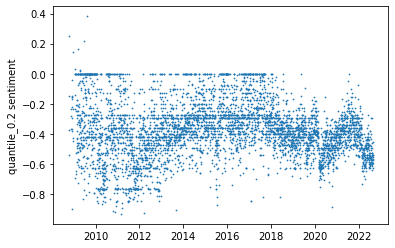

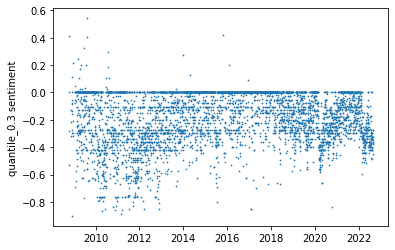

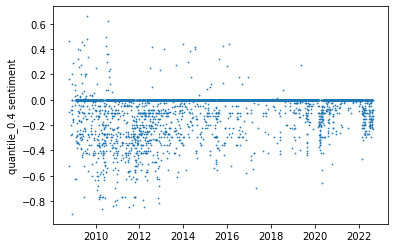

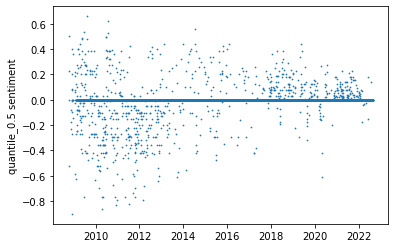

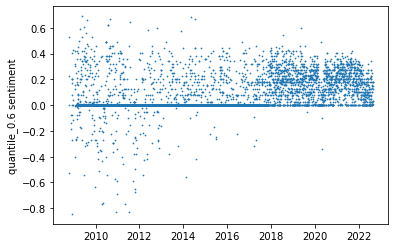

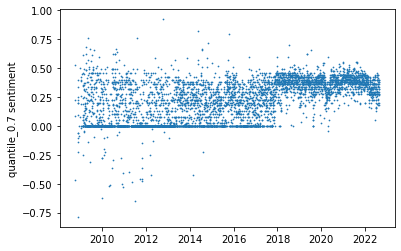

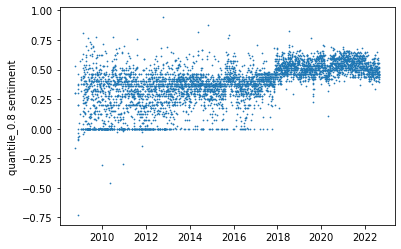

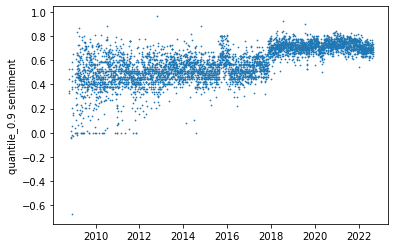

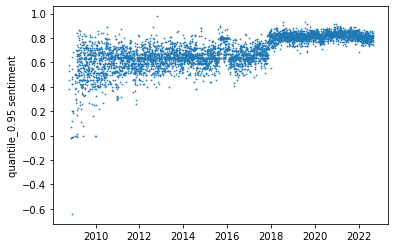

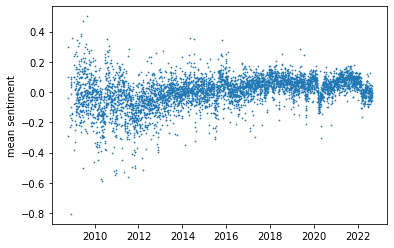

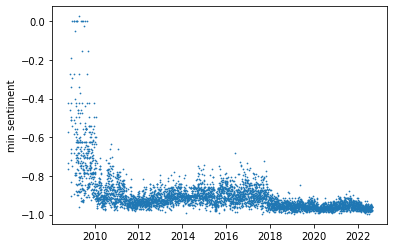

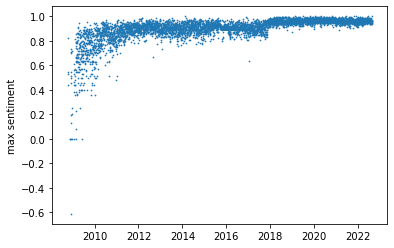

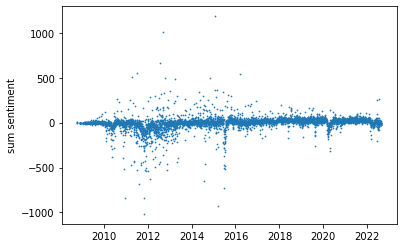

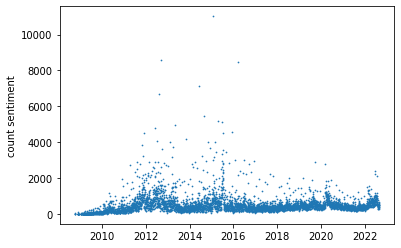

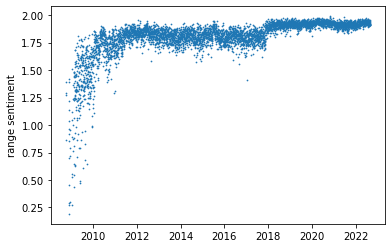

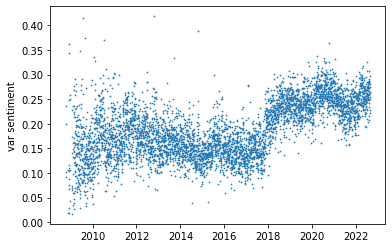

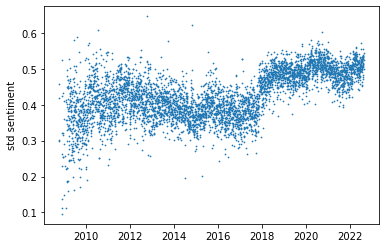

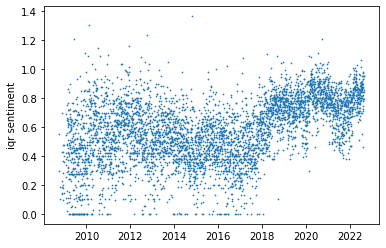

In [63]:
import matplotlib.pyplot as plt

#for each metric
for metric in list_metrics:
    
    #plot scatter against date and eur pricing
    plt.scatter(df_merged["date"], df_merged[metric + "_sent_eur_previous_1_days"], s=0.5)

    #set ylabel
    plt.ylabel(metric + " sentiment")

    #close
    plt.show()

Save the final data frame with EUR sentiment:

In [64]:
df_merged.to_csv("results/twitter_sentiment_data_eur.csv.gz", compression="gzip", index=False)
#df_merged = pd.read_csv("results/twitter_sentiment_data.csv.gz", compression="gzip")